In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from matplotlib import rcParams,font_manager
from matplotlib.ticker import FormatStrFormatter

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
rcParams['figure.figsize'] = (6,6) #figure size in inches
rcParams['font.family'] = "sans-serif" 
rcParams['font.weight'] = "roman" 
rcParams['font.style'] = "normal" # not 100% sure what this does but it was recommended
rcParams['font.size'] = 32 # not 100% sure what this does but it was recommended
rcParams['pdf.fonttype'] = 42
rcParams['axes.linewidth'] = 2 #thickness of the border
rcParams['xtick.major.width'] = rcParams['axes.linewidth'] # make sure line widths are consistent
rcParams['ytick.major.width'] = rcParams['axes.linewidth']
rcParams['axes.spines.right'] = False #hides right border
rcParams['axes.spines.top'] = False #hides top
rcParams['legend.frameon'] = False #hides box around the legend
rcParams['legend.fontsize'] = 18 #font size in pt
rcParams['axes.labelsize'] = 32 
rcParams['xtick.labelsize'] = 24
rcParams['ytick.labelsize'] = rcParams['xtick.labelsize']
rcParams['lines.linewidth'] = 3
rcParams['xtick.major.size'] = 5
rcParams['lines.markersize'] = 16
rcParams['ytick.major.size'] = rcParams['xtick.major.size'] 

In [3]:
direc = 'C:/Users/svo/Google Drive/Bas Games/Analysis/'
fig_direc = 'C:/Users/svo/Google Drive/Bas Games/Figures/'

In [4]:
S = np.loadtxt(direc + 'Summary Stats/summary_stats_hvh_final.txt')

In [40]:
name = ['dist_to_center','dist_to_self','dist_to_opp','dist_to_cm_self','dist_to_cm_opp',
        'neighbours_self','neighbours_opp','threats_made','threats_defended',
        'threats_executed']

stat_names = ['Distance to\n board center','Average distance\nto own pieces',
              'Average distance to\nopponent\'s pieces',
              'Distance to own\ncenter-of-mass',
              'Distance to opponent\'s\ncenter-of-mass',
              'Number of own\nneighbouring pieces',
              'Number of opponent\'s\nneighbouring pieces',
              'Number of\nthreats made','Number of\nthreats defended',
              'Number of\nthreats executed']

ireal = [15,3,6,9,12,18,21,24,27,30]
imod = [16,4,7,10,13,19,22,25,28,31]
ichance = [17,5,8,11,14,20,23,26,29,32]

In [10]:
def summ_hist(i,j):
    return np.bincount(S[:,i].astype(int),weights = S[:,j])/np.bincount(S[:,i].astype(int))

rho1 = [sts.pearsonr(summ_hist(0,ireal[i])-summ_hist(0,ichance[i]),
                 summ_hist(0,imod[i])-summ_hist(0,ichance[i]))[0] for i in range(len(name))]

rho2 = [sts.pearsonr(summ_hist(0,ireal[i]),
                 summ_hist(0,imod[i]))[0] for i in range(len(name))]

rho3 = [sts.pearsonr(summ_hist(0,ireal[i]),
                 summ_hist(0,ichance[i]))[0] for i in range(len(name))]


In [22]:
def plot_summary_by_npieces(i,legend):
    
    fig, ax = plt.subplots(figsize=(6,6))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
    
    ax.set_xlabel('Number of pieces')    
    ax.plot(summ_hist(1,ireal[i]),'-g',label='Data')
    ax.plot(summ_hist(1,imod[i]),'-',color='C0',label='Model')
    ax.plot(summ_hist(1,ichance[i]),'-.k',label='Random')
    ax.set_ylabel(stat_names[i])
    if legend:
        ax.legend()
    #fig.savefig(fig_direc + 'summary_npieces_' + letter + '.pdf')
    plt.show()    


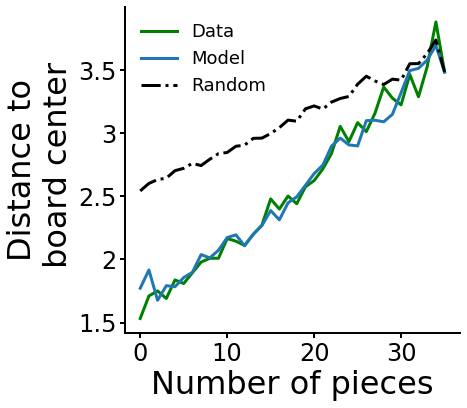

In [23]:
plot_summary_by_npieces(0,True)

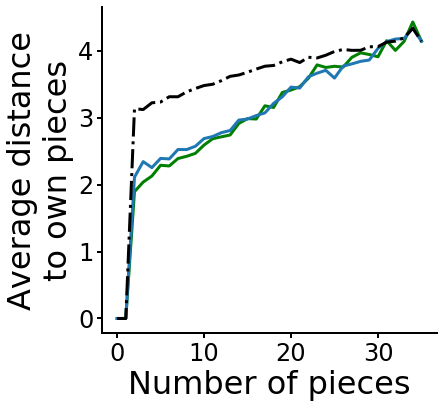

In [26]:
plot_summary_by_npieces(1,False)

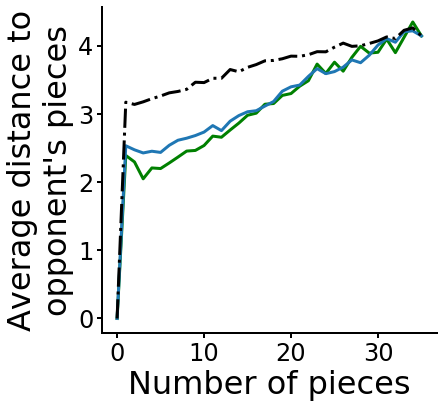

In [27]:
plot_summary_by_npieces(2,False)

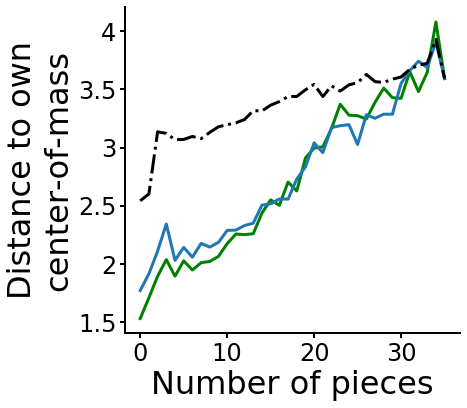

In [33]:
plot_summary_by_npieces(3,False)

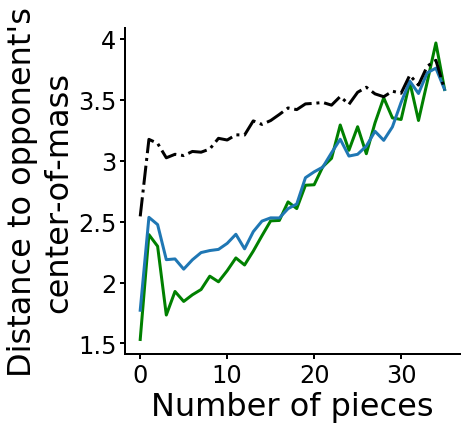

In [34]:
plot_summary_by_npieces(4,False)

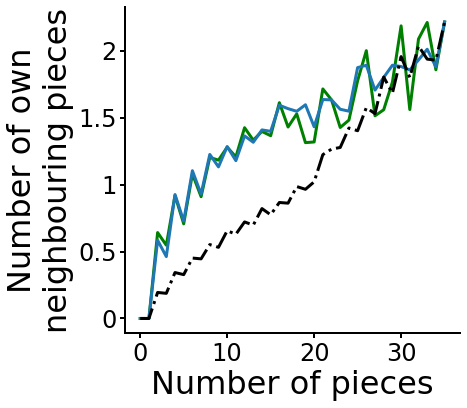

In [37]:
plot_summary_by_npieces(5,False)

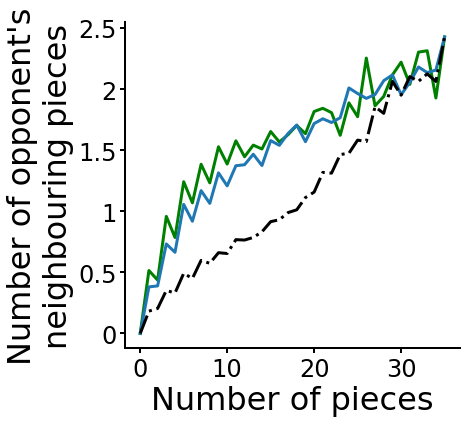

In [38]:
plot_summary_by_npieces(6,False)

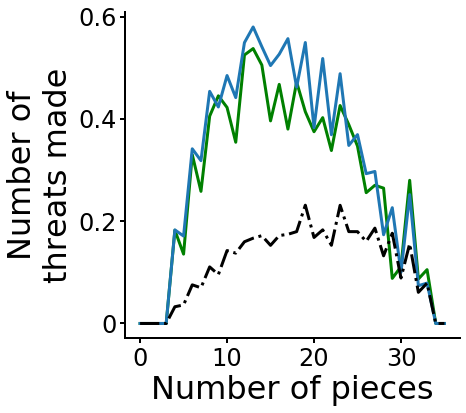

In [43]:
plot_summary_by_npieces(7,False)

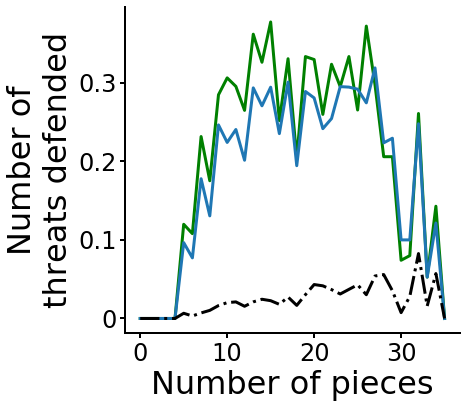

In [46]:
plot_summary_by_npieces(8,False)